as principales ligas de f ́utbol del mundo (Premier League, LaLiga,
Bundesliga, Serie A, etc.) tienen diferentes estilos y han evolucionado de
manera distinta a lo largo de los a ̃nos.
La problem ́atica es estudiar las oscilaciones en los indicadores clave de
rendimiento (KPIs) de las diferentes ligas a lo largo de los a ̃nos y
determinar si existe una relaci ́on entre estos cambios y factores como
innovaciones t ́acticas, cambios reglamentarios o influencias culturales

In [2]:
!pip install kaggle

In [3]:
# 1) Instala la librería de Kaggle
!pip install --quiet kaggle

# 2) (Solo en Colab) Sube tu kaggle.json y configura tu key
from google.colab import files
files.upload()  # selecciona tu kaggle.json

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3) Descarga y descomprime el dataset de Football Database
!kaggle datasets download -d technika148/football-database -p ./FOOTBALL --unzip


import pandas as pd
import os
from chardet import detect

csv_folder = "./FOOTBALL"
csv_files = [
    f for f in os.listdir(csv_folder)
    if os.path.isfile(os.path.join(csv_folder, f)) and f.endswith(".csv")
]

dfs = {}
for fname in csv_files:
    name = os.path.splitext(fname)[0]
    path = os.path.join(csv_folder, fname)

    # Primer intento: utf-8
    try:
        df = pd.read_csv(path)
        used_enc = 'utf-8'
    except UnicodeDecodeError:
        # Leer unos bytes para detectar encoding
        with open(path, 'rb') as f:
            raw = f.read(10000)
        result = detect(raw)
        enc = result['encoding'] or 'latin-1'
        # Segundo intento con el encoding detectado
        df = pd.read_csv(path, encoding=enc, on_bad_lines='skip')
        used_enc = enc

    dfs[name] = df
    print(f"'{name}' cargado: {df.shape[0]} filas x {df.shape[1]} columnas (encoding: {used_enc})")

# Mostrar primeras filas para verificar
for name, df in dfs.items():
    print(f"\n--- {name} ({dfs[name].shape[0]}×{dfs[name].shape[1]}) ---")
    display(df.head())



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/technika148/football-database
License(s): CC0-1.0
'teams' cargado: 146 filas x 2 columnas (encoding: utf-8)
'leagues' cargado: 5 filas x 3 columnas (encoding: utf-8)
'players' cargado: 7659 filas x 2 columnas (encoding: ISO-8859-1)
'shots' cargado: 324543 filas x 11 columnas (encoding: utf-8)
'teamstats' cargado: 25360 filas x 16 columnas (encoding: utf-8)
'appearances' cargado: 356513 filas x 19 columnas (encoding: utf-8)
'games' cargado: 12680 filas x 34 columnas (encoding: utf-8)

--- teams (146×2) ---


,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion



--- leagues (5×3) ---


,leagueID,name,understatNotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1



--- players (7659×2) ---


,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw



--- shots (324543×11) ---


,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707



--- teamstats (25360×16) ---


,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D



--- appearances (356513×19) ---


,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,81,557,0,0,0,0.0,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1
2,81,548,0,0,0,0.0,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1
3,81,628,0,0,0,0.0,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.0,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1



--- games (12680×34) ---


,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,...,5.90,1.62,3.6,6.00,1.67,4.00,5.75,1.64,4.07,6.04
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,...,4.27,1.91,3.5,4.00,2.00,3.50,4.20,1.82,3.88,4.70
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,...,5.62,1.73,3.5,5.00,1.73,3.90,5.40,1.75,3.76,5.44
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,...,4.34,2.00,3.1,2.70,2.00,3.40,4.33,1.79,3.74,5.10
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,...,3.08,2.60,3.1,2.88,2.60,3.25,3.00,2.46,3.39,3.14


In [4]:
# Y así con todos:
games_df = dfs['games']
leagues_df = dfs['leagues']
players_df     = dfs['players']
teamstats_df   = dfs['teamstats']
appearances_df = dfs['appearances']
shots_df       = dfs['shots']
teams_df       = dfs['teams']


In [5]:
# Unir teamstats con games (eliminando la columna season redundante)
merged_stats = pd.merge(
    dfs['teamstats'].drop(columns=['season']),  # <- Cambio clave aquí
    dfs['games'][['gameID', 'leagueID', 'season']],
    on='gameID'
)

# Agregar KPIs por liga y temporada
kpis = merged_stats.groupby(['leagueID', 'season']).agg({
    'xGoals': 'mean',
    'ppda': 'mean',
    'deep': 'mean',
    'shots': 'mean',
    'fouls': 'mean',
    'corners': 'mean'
}).reset_index()

# Añadir nombres de ligas
kpis = pd.merge(kpis, dfs['leagues'], on='leagueID')

In [6]:
!pip install kmapper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 2.0 MB/s eta 0:00:00



Resumen del grafo:
- Nodos generados: 24
- Conexiones (edges): 34
- Componentes conexas: 9


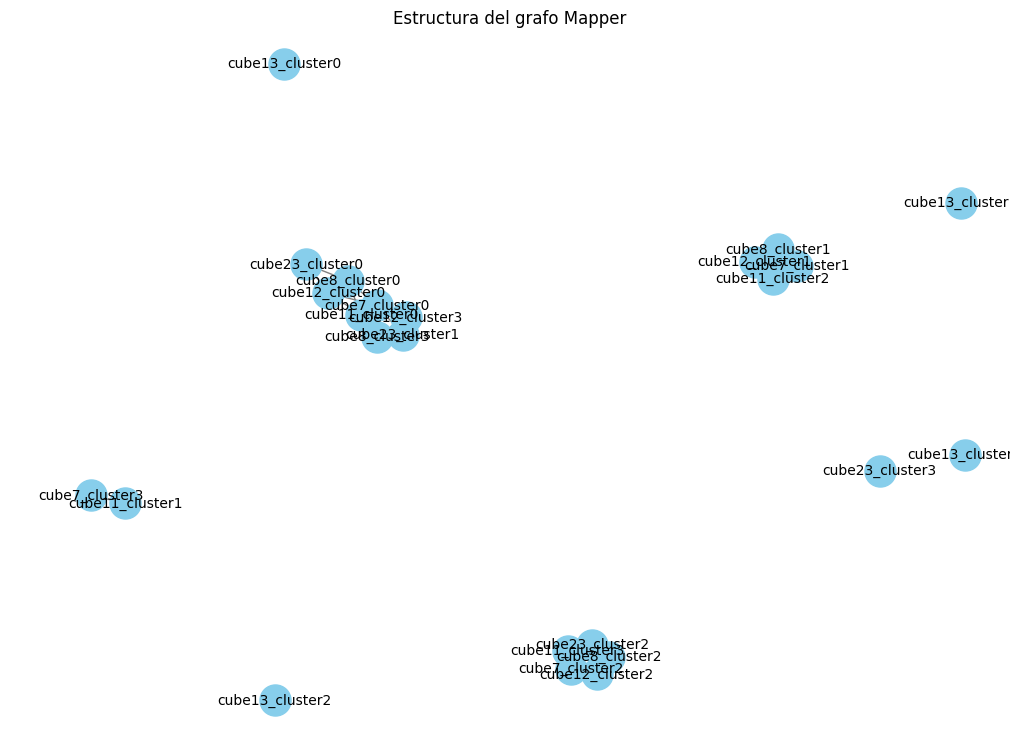

Visualización generada con éxito en leagues_evolution.html


In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import kmapper as km
from sklearn.cluster import KMeans  # <-- Añadir al inicio de tus imports
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering  # Cambiamos el clustering

# --- PREPARACIÓN DE DATOS ---
# (Usando tu código corregido anteriormente)
merged_stats = pd.merge(
    dfs['teamstats'].drop(columns=['season']),
    dfs['games'][['gameID', 'leagueID', 'season']],
    on='gameID'
)

kpis = merged_stats.groupby(['leagueID', 'season']).agg({
    'xGoals': 'mean',
    'ppda': 'mean',
    'deep': 'mean',
    'shots': 'mean',
    'fouls': 'mean',
    'corners': 'mean'
}).reset_index()

kpis = pd.merge(kpis, dfs['leagues'], on='leagueID')

# --- ANOTACIONES HISTÓRICAS ---
annotations = {
    "VAR Introducido": {"season": 2019, "league": "Premier League"},
    "Regla del Gol Visitante (abolida 2021)": {"season": 2021, "league": "UEFA"}
}

def create_annotated_tooltips(kpis_df, annotations):
    tooltips = []
    for _, row in kpis_df.iterrows():
        tip = f"<strong>{row['name']} - {row['season']}</strong><br>"
        tip += f"xG: {row['xGoals']:.2f} | PPDA: {row['ppda']:.2f}<br>"
        tip += f"Tiros: {row['shots']:.2f} | Faltas: {row['fouls']:.2f}<br>"

        events = [event for event, details in annotations.items()
                 if (row['season'] == details['season']) and (row['name'] == details['league'])]

        if events:
            tip += "<br><em>Eventos:</em><br>" + "<br>".join(events)

        tooltips.append(tip)
    return tooltips

# --- PIPELINE TDA MEJORADO ---
# Escalado robusto
scaler = preprocessing.RobustScaler()
scaled_data = scaler.fit_transform(kpis[['xGoals', 'ppda', 'deep', 'shots', 'fouls', 'corners']])

# Lente combinando PCA y tiempo
pca = PCA(n_components=2)  # Aumentamos componentes PCA
time_proj = kpis['season'].values.reshape(-1, 1) * 0.1  # Escalamos temporal
lens = np.hstack([pca.fit_transform(scaled_data), time_proj])

# Configuración de Mapper con clustering jerárquico
mapper = km.KeplerMapper()
graph = mapper.map(
    lens,
    scaled_data,
    cover=km.Cover(n_cubes=4, perc_overlap=0.35),  # Menos cubos
    clusterer=AgglomerativeClustering(n_clusters=4)  # Clustering más estable
)

# --- RESUMEN DEL GRAFO ---
import networkx as nx
import matplotlib.pyplot as plt

# --- RESUMEN DEL GRAFO ---
G = nx.Graph()

# Añadir nodos
for node in graph["nodes"]:
    G.add_node(node)

# Añadir aristas
for node, neighbors in graph["links"].items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Cálculos
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_components = nx.number_connected_components(G)

print(f"\nResumen del grafo:")
print(f"- Nodos generados: {num_nodes}")
print(f"- Conexiones (edges): {num_edges}")
print(f"- Componentes conexas: {num_components}")

# --- OPCIONAL: Visualización rápida del grafo ---
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # Layout bonito
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Estructura del grafo Mapper")
plt.show()

#########

# --- VALIDACIÓN DE CLUSTERS ---
if len(graph["nodes"]) == 0:
    raise ValueError("""
    No se encontraron clusters. Ajustar:
    1. Aumentar 'perc_overlap' en Cover
    2. Reducir 'n_clusters' en AgglomerativeClustering
    3. Probar diferentes combinaciones de PCA/time_proj
    """)

# --- VISUALIZACIÓN ENRIQUECIDA ---
custom_tooltips = create_annotated_tooltips(kpis, annotations)
custom_tooltips = np.array(custom_tooltips)  # <-- Esta línea nueva

# Eliminar el parámetro node_color_function y ajustar color_values
html = mapper.visualize(
    graph,
    path_html="leagues_evolution.html",
    title="Evolución Táctica de Ligas con Eventos Clave",
    color_values=kpis['season'].astype(str),  # Convertir a string
    custom_tooltips=custom_tooltips,
    color_function_name="Temporada"
)

# Añadir leyenda interactiva
legend_html = f"""
<div style="position: fixed; top: 20px; right: 20px; background: rgba(255,255,255,0.9); padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.2);">
    <h4 style="margin: 0 0 10px 0;">Eventos Clave</h4>
    <ul style="list-style: none; padding: 0; margin: 0;">
        {"".join(f'<li style="margin-bottom: 5px;"><strong>{event}</strong>: {details["season"]} - {details["league"]}</li>'
                for event, details in annotations.items())}
    </ul>
</div>
"""

html = html.replace('</body>', f'{legend_html}</body>')

with open("leagues_evolution.html", "w") as f:
    f.write(html)

print("Visualización generada con éxito en leagues_evolution.html")

In [9]:
!pip install ripser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.7 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=8f12d21374a7afc80123c7be8879ef739b138329222d8e499d346551e8eaa7a3
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


In [10]:
# ==================== IMPORTS ====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kmapper as km
import networkx as nx
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from ripser import Rips
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

# ==================== PREPROCESAMIENTO ====================
# 1. Unión y preparación de datos (como en tu código original)
merged_stats = pd.merge(
    dfs['teamstats'].drop(columns=['season']),
    dfs['games'][['gameID', 'leagueID', 'season']],
    on='gameID'
)

# 2. Cálculo de KPIs por liga y temporada
kpis = merged_stats.groupby(['leagueID', 'season']).agg({
    'xGoals': 'mean',
    'ppda': 'mean',
    'deep': 'mean',
    'shots': 'mean',
    'fouls': 'mean',
    'corners': 'mean'
}).reset_index()

# 3. Añadir nombres de ligas
kpis = pd.merge(kpis, dfs['leagues'], on='leagueID')

# ==================== ANÁLISIS PRINCIPAL ====================

# ------ 1. Optimización del Lente ------
scaler = RobustScaler()
scaled_data = scaler.fit_transform(kpis[['xGoals', 'ppda', 'deep', 'shots', 'fouls', 'corners']])

# Componentes del lente
pca = PCA(n_components=2, random_state=42)
pca_proj = pca.fit_transform(scaled_data)

tsne = TSNE(n_components=2, perplexity=15, random_state=42)
tsne_proj = tsne.fit_transform(scaled_data)

time_proj = kpis['season'].values.reshape(-1, 1) * 0.1
anomaly_scores = IsolationForest(random_state=42).fit_predict(scaled_data).reshape(-1, 1)

# Lente final combinado
lens = np.hstack([pca_proj, tsne_proj, time_proj, anomaly_scores])
print("Dimensiones del lente:", lens.shape)

# ------ 2. Análisis de Persistencia ------
rips = Rips()
diagrams = rips.fit_transform(scaled_data)

# —– Imprimir los datos numéricos de birth/death —–
for dim, pdgm in enumerate(diagrams):
    print(f"H{dim} (birth, death):")
    print(pdgm)
    print()

# —– Dibujar y guardar el Diagrama de Persistencia —–
plt.figure(figsize=(10, 5))
rips.plot(diagrams, show=False)
plt.title("Diagrama de Persistencia de los KPIs")
plt.savefig("persistence_diagram.png")
plt.close()

# ==================== VISUALIZACIÓN ====================

# ------ 1. Mapper de Evolución Táctica ------
mapper = km.KeplerMapper()
graph = mapper.map(
    lens,
    scaled_data,
    cover=km.Cover(n_cubes=3, perc_overlap=0.3),
    clusterer=AgglomerativeClustering(n_clusters=3)
)

# ------ 2. Visualización Interactiva ------
# (Usando tus tooltips y annotations originales)
annotations = {
    "VAR Introducido": {"season": 2019, "league": "Premier League"},
    "Regla del Gol Visitante (abolida 2021)": {"season": 2021, "league": "UEFA"}
}

def create_tooltips(kpis_df, annotations):
    tooltips = []
    for _, row in kpis_df.iterrows():
        tip = f"<strong>{row['name']} - {row['season']}</strong><br>"
        tip += f"xG: {row['xGoals']:.2f} | PPDA: {row['ppda']:.2f}<br>"
        tip += f"Tiros: {row['shots']:.2f} | Faltas: {row['fouls']:.2f}<br>"

        events = [event for event, details in annotations.items()
                if (row['season'] == details['season']) and (row['name'] == details['league'])]

        if events:
            tip += "<br><em>Eventos:</em><br>" + "<br>".join(events)

        tooltips.append(tip)
    return tooltips

custom_tooltips = create_tooltips(kpis, annotations)
custom_tooltips = np.array(custom_tooltips)

# Generar HTML
html = mapper.visualize(
    graph,
    path_html="leagues_evolution.html",
    title="Evolución Táctica Completa",
    color_values=kpis['season'].astype(str),
    custom_tooltips=custom_tooltips,
    color_function_name="Temporada"
)

# Añadir sección de análisis de persistencia al HTML
extra_html = """
<div style="margin: 20px; padding: 15px; background: #f8f9fa; border-radius: 8px;">
    <h3>Análisis de Persistencia</h3>
    <img src="persistence_diagram.png" style="max-width: 100%;">
    <p>Los diagramas de persistencia muestran características topológicas estables en los datos.</p>
</div>
"""

html = html.replace('</body>', f'{extra_html}</body>')

with open("leagues_evolution.html", "w") as f:
    f.write(html)

print("\nAnálisis completado con éxito:")
print("- Visualización principal guardada en leagues_evolution.html")
print("- Diagrama de persistencia guardado en persistence_diagram.png")

Dimensiones del lente: (35, 6)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
H0 (birth, death):
[[0.         0.407814  ]
 [0.         0.40983665]
 [0.         0.52992129]
 [0.         0.53017545]
 [0.         0.5304994 ]
 [0.         0.58358675]
 [0.         0.64847463]
 [0.         0.68642879]
 [0.         0.68840748]
 [0.         0.73098427]
 [0.         0.75433671]
 [0.         0.75465041]
 [0.         0.79947513]
 [0.         0.81076252]
 [0.         0.83144903]
 [0.         0.97925299]
 [0.         1.00507522]
 [0.         1.01912081]
 [0.         1.05612588]
 [0.         1.07650483]
 [0.         1.07917953]
 [0.         1.08210397]
 [0.         1.13514054]
 [0.         1.15449607]
 [0.         1.16413975]
 [0.         1.17578793]
 [0.         1.18739653]
 [0.         1.20678198]
 [0.         1.24642873]
 [0.         1.2513063 ]
 [0.         1.33860254]
 [0.         1.41597903]
 [0.         1.49000978]
 [0.         1.8108778 ]
 [0.            